<a href="https://colab.research.google.com/github/samp3209/MachineLearning/blob/main/randomforesterassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [111]:
df = pd.read_csv('DATA_RF.csv')


Y=df['PRICE']
X=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [112]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,3969.0,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.97,2,242,17.8,3969.0,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.97,2,242,17.8,3928.3,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.06,3,222,18.7,3946.3,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.06,3,222,18.7,3969.0,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.48,1,273,21.0,3919.9,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.29,1,273,21.0,3969.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.17,1,273,21.0,3969.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.39,1,273,21.0,3934.5,6.48,22.0


In [113]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, Y_train)

y_pred_rf = rnd_clf.predict(X_test)


In [114]:
rnd_clf.score(X_train, Y_train)

0.9237443520792521

In [115]:
print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_rf))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_rf))
print('r2 score is :', r2_score(Y_test, y_pred_rf))

Mean Absolute percentage Error : 0.15653382627789317
Mean Absolute Error : 2.705107126397357
r2 score is : 0.8224110567223429


In [116]:
importances = rnd_clf.feature_importances_

In [117]:
import time
import numpy as np

start_time = time.time()
importances = rnd_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rnd_clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.096 seconds


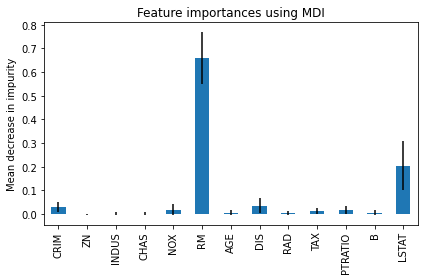

In [118]:
forest_importances = pd.Series(importances, X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

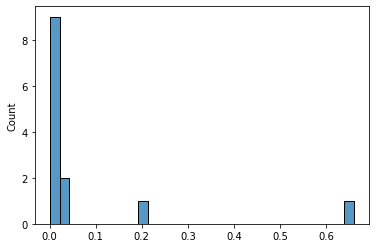

In [119]:

sns.histplot(data=forest_importances)

# Scaler 

In [120]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df.values)
sdf = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
sdf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140023,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.558335,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.558335,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.076471,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.076471,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625298,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.715615,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.772657,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668079,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


In [121]:
Y=sdf['PRICE']
X=sdf[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
sX_train, sX_test, sY_train, sY_test = train_test_split(X, Y, test_size=0.3)

In [122]:
srnd_clf = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, random_state=42)
srnd_clf.fit(sX_train, sY_train)

sy_pred_rf = srnd_clf.predict(sX_test)


In [123]:
srnd_clf.score(sX_train, sY_train)

0.931978567093661

In [124]:
print('Mean Absolute percentage Error :',mean_absolute_percentage_error(sY_test, sy_pred_rf))
print('Mean Absolute Error :',mean_absolute_error(sY_test, sy_pred_rf))
print('r2 score is :', r2_score(sY_test, sy_pred_rf))

Mean Absolute percentage Error : 2.0783050313950233
Mean Absolute Error : 0.27351236046246374
r2 score is : 0.8569060132212991


In [125]:
importances = srnd_clf.feature_importances_

In [126]:
start_time = time.time()
importances = srnd_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in srnd_clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.116 seconds


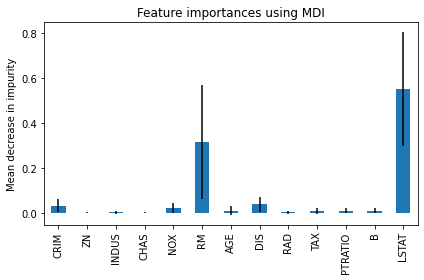

In [127]:
forest_importances = pd.Series(importances, sX_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

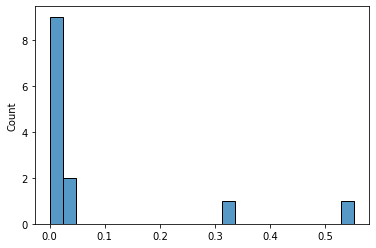

In [128]:

sns.histplot(data=forest_importances)

# 100 Estimators

In [129]:
rnd_clf = RandomForestRegressor(n_estimators=100, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, Y_train)

y_pred_rf = rnd_clf.predict(X_test)


In [130]:
rnd_clf.score(X_train, Y_train)

0.9218039407618668

In [131]:
print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_rf))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_rf))
print('r2 score is :', r2_score(Y_test, y_pred_rf))

Mean Absolute percentage Error : 0.1580050226181648
Mean Absolute Error : 2.7177002667918315
r2 score is : 0.8176978277939688


In [132]:
importances = rnd_clf.feature_importances_

In [133]:
start_time = time.time()
importances = rnd_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rnd_clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.021 seconds


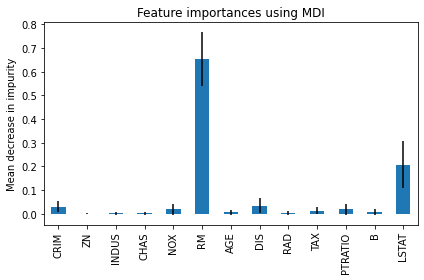

In [134]:
forest_importances = pd.Series(importances, X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

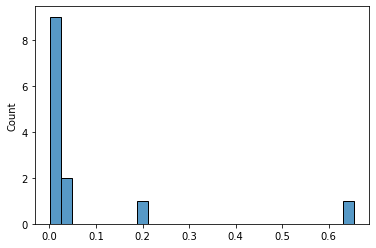

In [135]:

sns.histplot(data=forest_importances)

#Scaler 100 

In [136]:
srnd_clf = RandomForestRegressor(n_estimators=100, max_leaf_nodes=16, random_state=42)
srnd_clf.fit(sX_train, sY_train)

sy_pred_rf = srnd_clf.predict(X_test)


In [137]:
srnd_clf.score(sX_train, sY_train)

0.9324879529750284

In [138]:
print('Mean Absolute percentage Error :',mean_absolute_percentage_error(sY_test, sy_pred_rf))
print('Mean Absolute Error :',mean_absolute_error(sY_test, sy_pred_rf))
print('r2 score is :', r2_score(sY_test, sy_pred_rf))

Mean Absolute percentage Error : 1.4350030386124688
Mean Absolute Error : 0.6918805117543333
r2 score is : -0.02004688795148679


In [139]:
importances = srnd_clf.feature_importances_

In [140]:
start_time = time.time()
importances = srnd_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in srnd_clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.027 seconds


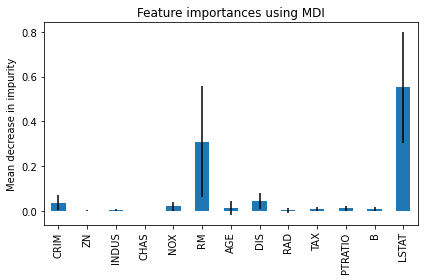

In [141]:
forest_importances = pd.Series(importances, sX_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

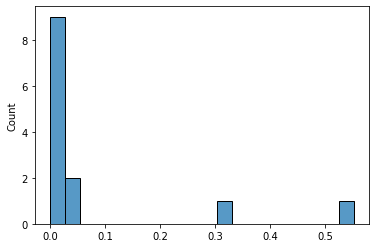

In [142]:

sns.histplot(data=forest_importances)

# 100 to 300 Estimators

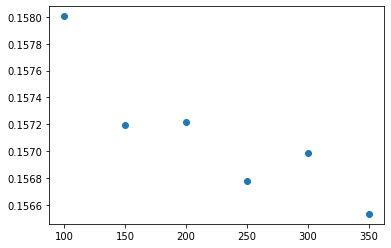

In [143]:
errors = []
treenum = []
for i in range (100,400,50):
  rnd_clf = RandomForestRegressor(n_estimators=int(i), max_leaf_nodes=16, random_state=42)
  rnd_clf.fit(X_train, Y_train)

  y_pred_rf = rnd_clf.predict(X_test)
  errors.append(mean_absolute_percentage_error(Y_test, y_pred_rf))
  treenum.append(i)

plt.scatter(treenum,errors)
plt.show()



# Write Up

# It seems that through standard scaling this dataset that the accuracy increases slightly because the model is using LSTAT more which was shown to have a higher importance after the scale. As far as the number of estimators goes it seems that generally as the number of estimators increases the MAPE decreases.